In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import resample
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
path = "Proyecto2/Processed_Dataframes/"

Accidentes_data = pd.read_excel("Proyecto2/Processed_Dataframes/accidentes_training.xlsx", index_col=None)
Personas_data = pd.read_excel("Proyecto2/Processed_Dataframes/personas_training.xlsx", index_col=None)
Full_data = pd.read_excel("Proyecto2/Processed_Dataframes/Full_data.xlsx", index_col=None)


In [3]:
Full_data_rev = Full_data.copy()
Full_data_rev = Full_data_rev.drop(columns=['Fecha_persona', 'Mes_persona', 'Hora_persona', 'Nomcomuna_persona', 'Región_persona' ])
categorical_cols = ['Nomcomuna', 'Región', 'Calidad', 'Sexo', 'Causas', 'Urbano/Rural', 'TipoUbicacion']
Full_data_rev['Resultado'] = Full_data_rev['Resultado'].str.lower().str.strip()

Full_data_rev['Resultado'] = Full_data_rev['Resultado'].replace({
    'fallecido': 'muerto',
    'ilesos': 'ileso'
})

Full_data_rev['Sexo'] = Full_data_rev['Sexo'].replace({
    'se ignora': 'desconocido',
})

Full_data_rev = Full_data_rev[Full_data_rev['Resultado'] != 'se ignora']


In [4]:
Full_data_rev['Resultado'] = Full_data_rev['Resultado'].replace({
    'menos grave': 'grave',
    'muerto': 'grave'
})

In [5]:
Accidentes_data.head()

,Idaccidente,Fecha,Mes,Hora,Nomcomuna,Región,Accdtes.,Causas,Urbano/Rural,Muertos,Graves,M/Grave,Leves,Ilesos,TipoUbicacion
0,1586623,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
1,1583417,2024-01-01,enero,2025-06-23 00:30:00,san felipe,De Valparaíso,choque,Conducción no atento condiciones transito momento,urbano,0,0,0,0,2,Intersección
2,1584272,2024-01-01,enero,2025-06-23 00:30:00,ñiquen,De Ñuble,choque,Animales sueltos via publica,rural,0,0,0,0,1,Ruta
3,1581924,2024-01-01,enero,2025-06-23 00:45:00,puente alto,Metropolitana de Santiago,colision,Conducción no atento condiciones transito momento,urbano,0,1,0,0,1,Intersección
4,1581883,2024-01-01,enero,2025-06-23 01:00:00,talca,Del Maule,colision,Conducción por izquierda eje calzada,urbano,0,0,0,0,2,Intersección


In [6]:
Personas_data.head()

,Idaccidente,Fecha,Mes,Hora,Nomcomuna,Región,Calidad,Sexo,Edad,Resultado
0,1586623,2024-01-01,enero,00:00:00,quirihue,De Ñuble,conductor,masculino,40,leve
1,1586623,2024-01-01,enero,00:00:00,quirihue,De Ñuble,pasajero,femenino,24,leve
2,1586623,2024-01-01,enero,00:00:00,quirihue,De Ñuble,conductor,masculino,23,leve
3,1583417,2024-01-01,enero,00:30:00,san felipe,De Valparaíso,conductor,masculino,35,ileso
4,1583417,2024-01-01,enero,00:30:00,san felipe,De Valparaíso,conductor,masculino,0,ileso


In [7]:
Full_data_rev.head()

,Idaccidente,Calidad,Sexo,Edad,Resultado,Fecha_accidente,Mes_accidente,Hora_accidente,Nomcomuna_accidente,Región_accidente,Accdtes.,Causas,Urbano/Rural,Muertos,Graves,M/Grave,Leves,Ilesos,TipoUbicacion
0,1586623,conductor,masculino,40,leve,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
1,1586623,pasajero,femenino,24,leve,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
2,1586623,conductor,masculino,23,leve,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
3,1583417,conductor,masculino,35,ileso,2024-01-01,enero,2025-06-23 00:30:00,san felipe,De Valparaíso,choque,Conducción no atento condiciones transito momento,urbano,0,0,0,0,2,Intersección
4,1583417,conductor,masculino,0,ileso,2024-01-01,enero,2025-06-23 00:30:00,san felipe,De Valparaíso,choque,Conducción no atento condiciones transito momento,urbano,0,0,0,0,2,Intersección


In [8]:
Full_data_rev = Full_data_rev.set_index(Full_data_rev.columns[0])
Full_data_rev.head()

,Calidad,Sexo,Edad,Resultado,Fecha_accidente,Mes_accidente,Hora_accidente,Nomcomuna_accidente,Región_accidente,Accdtes.,Causas,Urbano/Rural,Muertos,Graves,M/Grave,Leves,Ilesos,TipoUbicacion
Idaccidente,,,,,,,,,,,,,,,,,,
1586623,conductor,masculino,40,leve,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
1586623,pasajero,femenino,24,leve,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
1586623,conductor,masculino,23,leve,2024-01-01,enero,2025-06-23 00:00:00,quirihue,De Ñuble,colision,Conducción no atento condiciones transito momento,urbano,0,0,0,3,0,Intersección
1583417,conductor,masculino,35,ileso,2024-01-01,enero,2025-06-23 00:30:00,san felipe,De Valparaíso,choque,Conducción no atento condiciones transito momento,urbano,0,0,0,0,2,Intersección
1583417,conductor,masculino,0,ileso,2024-01-01,enero,2025-06-23 00:30:00,san felipe,De Valparaíso,choque,Conducción no atento condiciones transito momento,urbano,0,0,0,0,2,Intersección


In [9]:
df_grave = Full_data_rev[Full_data_rev['Resultado'] == 'grave']
df_leve = Full_data_rev[Full_data_rev['Resultado'] == 'leve']
df_ileso = Full_data_rev[Full_data_rev['Resultado'] == 'ileso']

min_count = min(len(df_grave), len(df_leve))

df_ileso_under = resample(df_ileso,
                          replace=False,
                          n_samples=min_count,
                          random_state=42)

df_grave_bal = resample(df_grave, n_samples=min_count, replace=False, random_state=42)
df_leve_bal = resample(df_leve, n_samples=min_count, replace=False, random_state=42)

df_balanced = pd.concat([df_grave_bal, df_leve_bal, df_ileso_under])

df_balanced['Año'] = df_balanced['Fecha_accidente'].dt.year
df_balanced['Mes'] = df_balanced['Fecha_accidente'].dt.month
df_balanced['Día'] = df_balanced['Fecha_accidente'].dt.day
df_balanced['Hora'] = df_balanced['Hora_accidente'].dt.hour

df_balanced = df_balanced.drop(columns=['Fecha_accidente', 'Hora_accidente'])
le_dict = {}
for col in df_balanced.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_balanced[col] = le.fit_transform(df_balanced[col].astype(str))
    le_dict[col] = le
X_balanced = df_balanced.drop('Resultado', axis=1)
y_balanced = df_balanced['Resultado']

              precision    recall  f1-score   support

       grave       0.85      0.93      0.89      3542
       ileso       0.96      0.87      0.91      3543
        leve       0.84      0.85      0.84      3543

    accuracy                           0.88     10628
   macro avg       0.88      0.88      0.88     10628
weighted avg       0.88      0.88      0.88     10628

[[3282   26  234]
 [ 151 3066  326]
 [ 425  117 3001]]


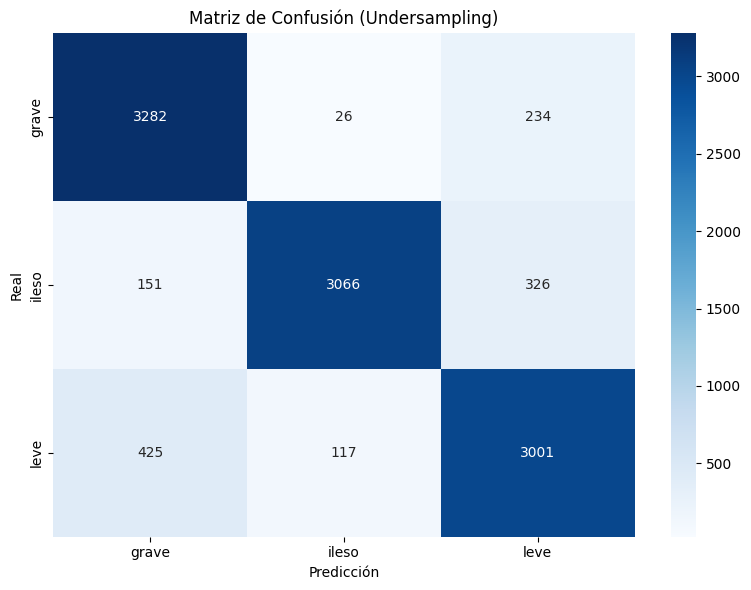

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

clf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=30,
    bootstrap=True,
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
class_names = le_dict['Resultado'].classes_

print(classification_report(y_test, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Undersampling)")
plt.tight_layout()
plt.savefig('confusion_matrix_undersampling.png')
plt.show()

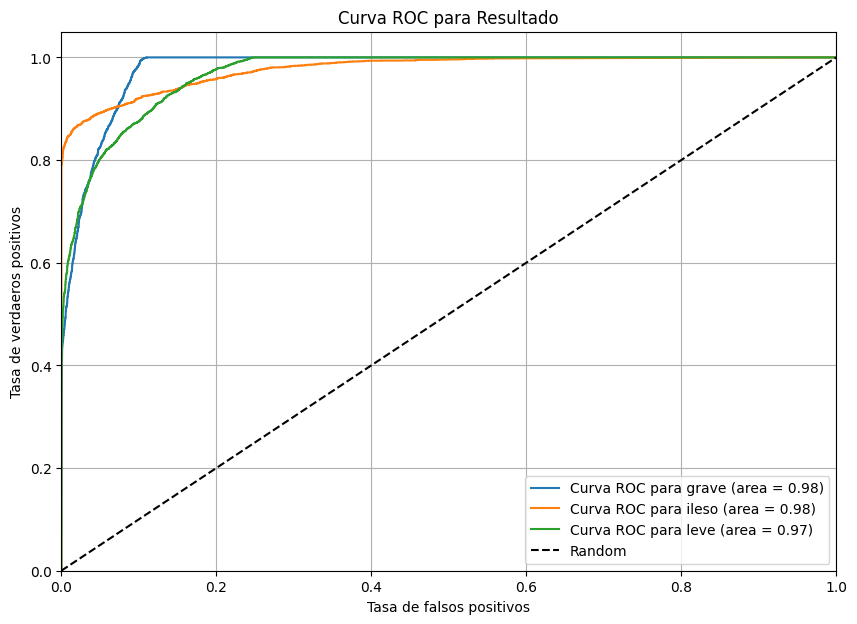

In [11]:
from sklearn.metrics import roc_curve, auc


y_proba = clf.predict_proba(X_test)


label_mapping = {0: 'grave', 1: 'ileso', 2: 'leve'}
y_test_mapped = y_test.map(label_mapping)

fpr = {}
tpr = {}
roc_auc = {}
for i, class_name in enumerate(class_names):
  fpr[class_name], tpr[class_name], _ = roc_curve(y_test_mapped, y_proba[:, i], pos_label=class_name)
  roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])

plt.figure(figsize=(10, 7))
for class_name in class_names:
  plt.plot(fpr[class_name], tpr[class_name], label=f'Curva ROC para {class_name} (area = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaeros positivos')
plt.title('Curva ROC para Resultado')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()


In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_balanced, y_balanced, cv=cv, scoring='roc_auc_ovo_weighted')
print(f"AUC promedio: {scores.mean():.4f} ± {scores.std():.4f}")

AUC promedio: 0.8970 ± 0.0635


              precision    recall  f1-score   support

       grave       0.74      0.81      0.77     11808
       ileso       0.99      0.88      0.93     99052
        leve       0.73      0.95      0.82     30811

    accuracy                           0.89    141671
   macro avg       0.82      0.88      0.84    141671
weighted avg       0.91      0.89      0.89    141671

[[ 9544   404  1860]
 [ 2633 87449  8970]
 [  739   924 29148]]


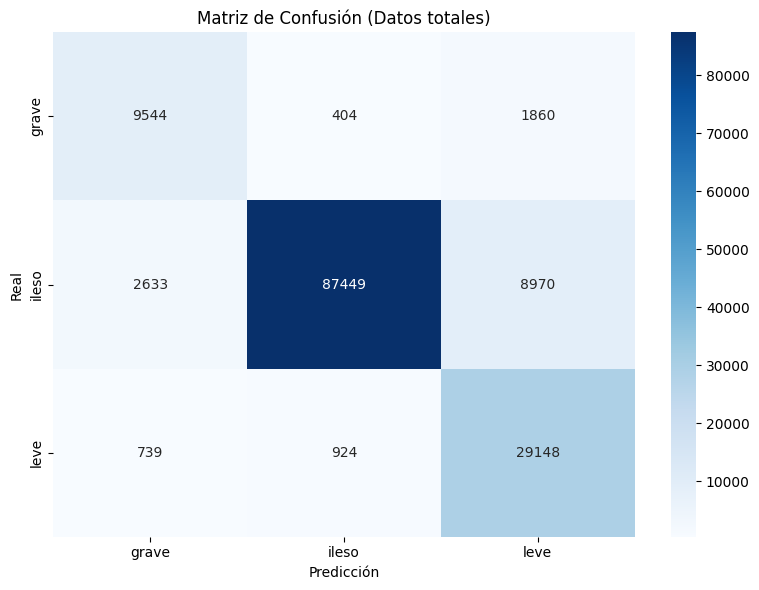

In [13]:
df_real = Full_data_rev.copy()
df_real['Año'] = df_real['Fecha_accidente'].dt.year
df_real['Mes'] = df_real['Fecha_accidente'].dt.month
df_real['Día'] = df_real['Fecha_accidente'].dt.day
df_real['Hora'] = df_real['Hora_accidente'].dt.hour

df_real = df_real.drop(columns=['Fecha_accidente', 'Hora_accidente'])

for col in df_real.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_real[col] = le.fit_transform(df_real[col].astype(str))
    le_dict[col] = le

X_original = df_real.drop('Resultado', axis=1)
y_original = df_real['Resultado']

y_pred_original = clf.predict(X_original)
y_proba_original = clf.predict_proba(X_original)

proba_grave = y_proba_original[:, 0]
threshold = 0.75
y_pred_custom = []
for i, p in enumerate(proba_grave):
    if p >= threshold:
        y_pred_custom.append(0)
    else:
        y_pred_custom.append(np.argmax(y_proba_original[i, 1:]) + 1)

y_pred_custom = np.array(y_pred_custom)

class_names = le_dict['Resultado'].classes_

print(classification_report(y_original, y_pred_custom, target_names=class_names))
cm = confusion_matrix(y_original, y_pred_custom)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Datos totales)")
plt.tight_layout()
plt.savefig("confusion_real.png")
plt.show()